# Global Power Plant Database Project

## Problem Statement:


##### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 


## Task
Prediction :   `Make two prediction  1) Primary Fuel    2) capacity_mw` 

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings


warnings.filterwarnings('ignore')

In [3]:
#Extracting dataset and saving dataset in a variable

data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
#Displaying the dataset

data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
#Checking our dataset rows and columns

data.shape

(908, 25)

## Statistical Summary

In [6]:
#Check if any null values present

data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
#checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

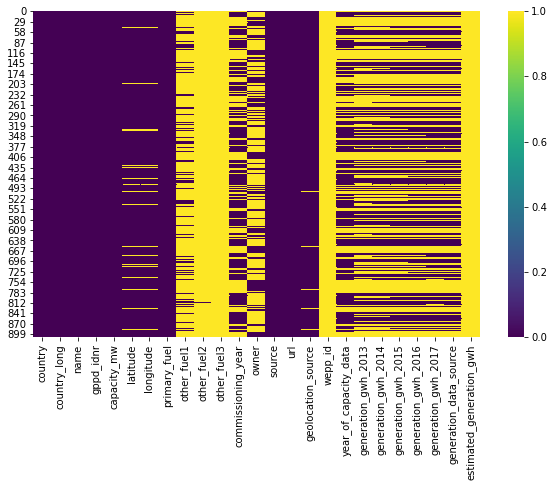

In [8]:
#Let's visualize the dataset that contains the null vaues

plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='viridis')
plt.show()

In [8]:
#Let's check the data available in these columns:


print('wepp_id: \n',data['wepp_id'].value_counts(),'\n')
print('estimated_generation_gwh: \n',data['estimated_generation_gwh'].value_counts(),'\n')
print('other_fuel2: \n',data['other_fuel2'].value_counts(),'\n')
print('other_fuel3: \n',data['other_fuel3'].value_counts(),'\n')

wepp_id: 
 Series([], Name: wepp_id, dtype: int64) 

estimated_generation_gwh: 
 Series([], Name: estimated_generation_gwh, dtype: int64) 

other_fuel2: 
 Oil    1
Name: other_fuel2, dtype: int64 

other_fuel3: 
 Series([], Name: other_fuel3, dtype: int64) 



- We could see that 'other_fuel3','wepp_id','estimated_generation_gwh' has complete null values in the dataset
- and 'other_fuel2' has just one row filled and all other data rows contain Null values

SO, let's remove these columns

In [9]:
data = data.drop(columns = ['other_fuel3','other_fuel3','estimated_generation_gwh','other_fuel2','wepp_id'])  #drop columns

In [10]:
data['country'].value_counts()

IND    908
Name: country, dtype: int64

- Column: "country" consists of only one unique data "India", let's remove this column

In [11]:
data['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

- Column: "country_long" consists of only one unique data "India", let's remove this column

In [12]:
# Dropping country and country_long columns as it contains only 'India' as value.

data = data.drop(columns =['country', 'country_long'])


In [13]:
# Dropping the url(address to the website) column as it is not contributing to the dataset model building.

data = data.drop('url', axis = 1)


In [14]:
data['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

- Column: "generation_data_source" consists of only one unique data 450 - "Central Electricity Authority" and rest rows are null data, let's remove this column

In [15]:
data = data.drop('generation_data_source', axis = 1)   #removing unnecessary columns


In [16]:
data['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

- Column: "year_of_capacity_data" consists of only one unique data "2018.0" of 520 rows and rest rows consists of null values, let's remove this column

In [17]:
data = data.drop('year_of_capacity_data', axis = 1)   #removing unnecessary columns


In [18]:
data['gppd_idnr'].nunique()

908

- "gppd_idnr" contains uniques ID for all the 908 rows, so, let's remove this as it is not contributing n our data modeling prediction

In [19]:
data = data.drop('gppd_idnr', axis = 1)   #removing unnecessary columns


In [20]:
data['name'].nunique()

908

- Column: "name", contains 908 unique names, let's drop this column 

In [21]:
data = data.drop('name', axis = 1)   #removing unnecessary columns


In [22]:
data['owner'].isna().sum()

566

- Out of 908 rows, 566 rows are null, more than the total values we have the null values, so we will remove this column

In [23]:
data = data.drop('owner', axis = 1)   #removing unnecessary columns


In [24]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [25]:
data.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [26]:
#filling null values using mean values
data["latitude"]=data["latitude"].fillna(data["latitude"].median())
data["longitude"]=data["longitude"].fillna(data["longitude"].median())

data["generation_gwh_2013"]=data["generation_gwh_2013"].fillna(0)
data["generation_gwh_2014"]=data["generation_gwh_2014"].fillna(0)
data["generation_gwh_2015"]=data["generation_gwh_2015"].fillna(0)
data["generation_gwh_2016"]=data["generation_gwh_2016"].fillna(0)
data["generation_gwh_2017"]=data["generation_gwh_2017"].fillna(0)

In [27]:
data['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [28]:
data['geolocation_source'].mode()  #To get the mode value

0    WRI
dtype: object

In [29]:
 #replace null values  with the "geolocation_source" mode value
    
data["geolocation_source"]=data["geolocation_source"].fillna('WRI')

In [30]:
data['commissioning_year'].unique()   #to check the unique values prent on this "commissioning_year" column

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [31]:
data['commissioning_year'].mode() #To get the mode value

0    2013.0
dtype: float64

In [32]:
 #replace null values  with the "commissioning_year" mode value

data['commissioning_year']=data['commissioning_year'].fillna(2013.0)


In [33]:
data['other_fuel1'].value_counts() 

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [34]:
#Let's replace the null value with "0(unknown term)" considering the possibility that the real value may be related to any other_fuel

data['other_fuel1']=data['other_fuel1'].fillna(0) 


In [35]:
#Let's check the total null values if present any

data.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

<AxesSubplot:>

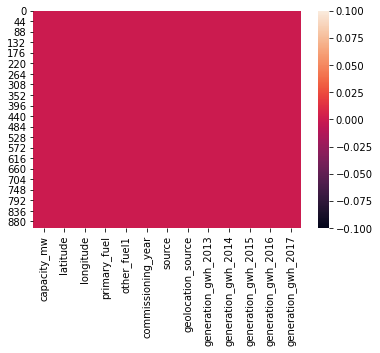

In [36]:
sns.heatmap(data.isnull())#Helps to visualize it better for null values.


###### Our dataset doesn't contain any more null vaues

In [37]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          908 non-null    object 
 5   commissioning_year   908 non-null    float64
 6   source               908 non-null    object 
 7   geolocation_source   908 non-null    object 
 8   generation_gwh_2013  908 non-null    float64
 9   generation_gwh_2014  908 non-null    float64
 10  generation_gwh_2015  908 non-null    float64
 11  generation_gwh_2016  908 non-null    float64
 12  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.3+ KB


Our Dataset contains 9 numerical data and 6 categorical data

# Data Engineering

In [38]:
#Let's assign the respective fuel type for the primary fuel data and create a column

fuel_map = {'Coal':'Fossil','Gas':'Fossil','Oil':'Fossil','Biomass':'Other_renewable',
            'Hydro':'Hydro','Nuclear':'Nuclear','Wind':'Wind','Solar':'Solar'}


data['fuel_type'] = data.primary_fuel.map(fuel_map)

#In general,  we do have a caegory for the fuel type (i.e., whether it is "renewable" (or) "non-renewable")
#The below is the set of fuel type under "renewable category"
renewable = ['Hydro','Other_renewable','Wind','Solar']


#For the above fuel type column, let's us now assign a new column "renewable" stating whether the corresponding fuel_type data is "renewable" (or) "non-renewable"

data['renewable'] = ['renewable' if i in renewable else 'non-renewable' for i in data['fuel_type'] ]


data.head()  #let's display the updated dataset after adding the above new columns

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type,renewable
0,2.5,28.1839,73.2407,Solar,0,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.000000,0.000000,0.000,0.000000,0.000000,Solar,renewable
1,98.0,24.7663,74.6090,Coal,0,2013.0,Ultratech Cement ltd,WRI,0.000000,0.000000,0.000,0.000000,0.000000,Fossil,non-renewable
2,39.2,21.9038,69.3732,Wind,0,2013.0,CDM,WRI,0.000000,0.000000,0.000,0.000000,0.000000,Wind,renewable
3,135.0,23.8712,91.3602,Gas,0,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,Fossil,non-renewable
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Fossil,non-renewable


## Exploratory Data Analysis(EDA)

Let's visualize the dataset columns

### Univariate Analysis

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


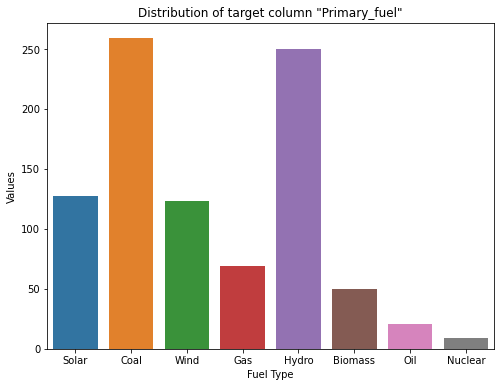

In [39]:
# Checking the value counts.

print(data['primary_fuel'].value_counts())



# Plotting bar plot to show the distribution of target coulmn.

plt.figure(figsize=[8,6])
sns.countplot(x='primary_fuel', data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Values')
plt.title('Distribution of target column "Primary_fuel"')
plt.show()

- We can see that the target column 'primary_fuel' is imbalanced. We'll balance it later.

renewable        550
non-renewable    358
Name: renewable, dtype: int64


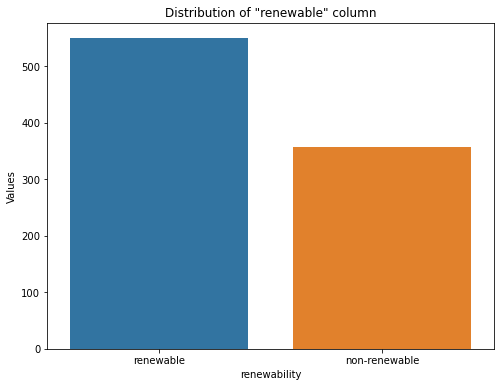

In [39]:
# Checking the value counts.

print(data['renewable'].value_counts())



# Plotting bar plot to show the distribution of "renewable" coulmn.

plt.figure(figsize=[8,6])
sns.countplot(x='renewable', data=data)
plt.xlabel('renewability')
plt.ylabel('Values')
plt.title('Distribution of "renewable" column')
plt.show()

- We could see more than half of the total rows "908", our data rows "primary fuels" are renewable

Fossil             349
Hydro              250
Solar              127
Wind               123
Other_renewable     50
Nuclear              9
Name: fuel_type, dtype: int64


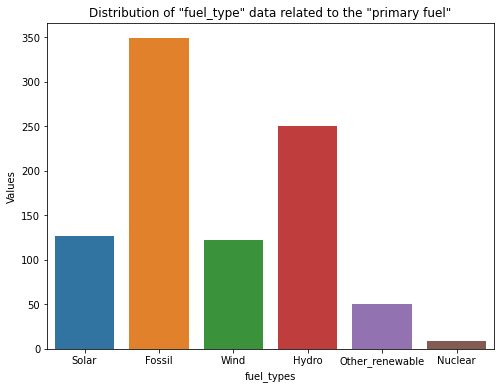

In [40]:
# Checking the value counts.

print(data['fuel_type'].value_counts())



# Plotting bar plot to show the distribution of "fuel_type" coulmn.

plt.figure(figsize=[8,6])
sns.countplot(x='fuel_type', data=data)
plt.xlabel('fuel_types')
plt.ylabel('Values')
plt.title('Distribution of "fuel_type" data related to the "primary fuel"')
plt.show()

- Here, Large number of data are of "Fossil" fuel type then, comes the Hydro.
- "Nuclear" fuel type counts are at the least when compared to other fuel tpes

### Bivariate Analysis

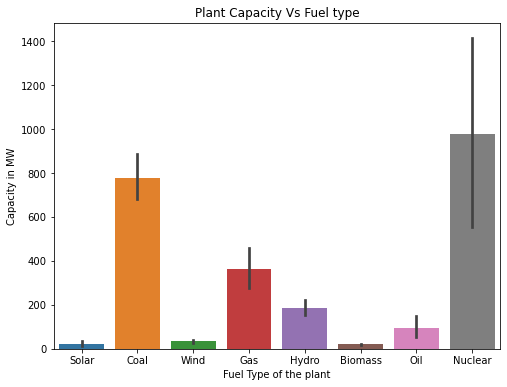

In [42]:
# Checking the distribution of capacity of plants fuel type wise

plt.figure(figsize=[8,6])
sns.barplot(x='primary_fuel', y='capacity_mw', data=data)
plt.xlabel('Fuel Type of the plant')
plt.ylabel('Capacity in MW')
plt.title('Plant Capacity Vs Fuel type')
plt.show()

- We can see that the Nuclear type power plants have highest capacity.
- Coal type power plants have the second highest capacity.

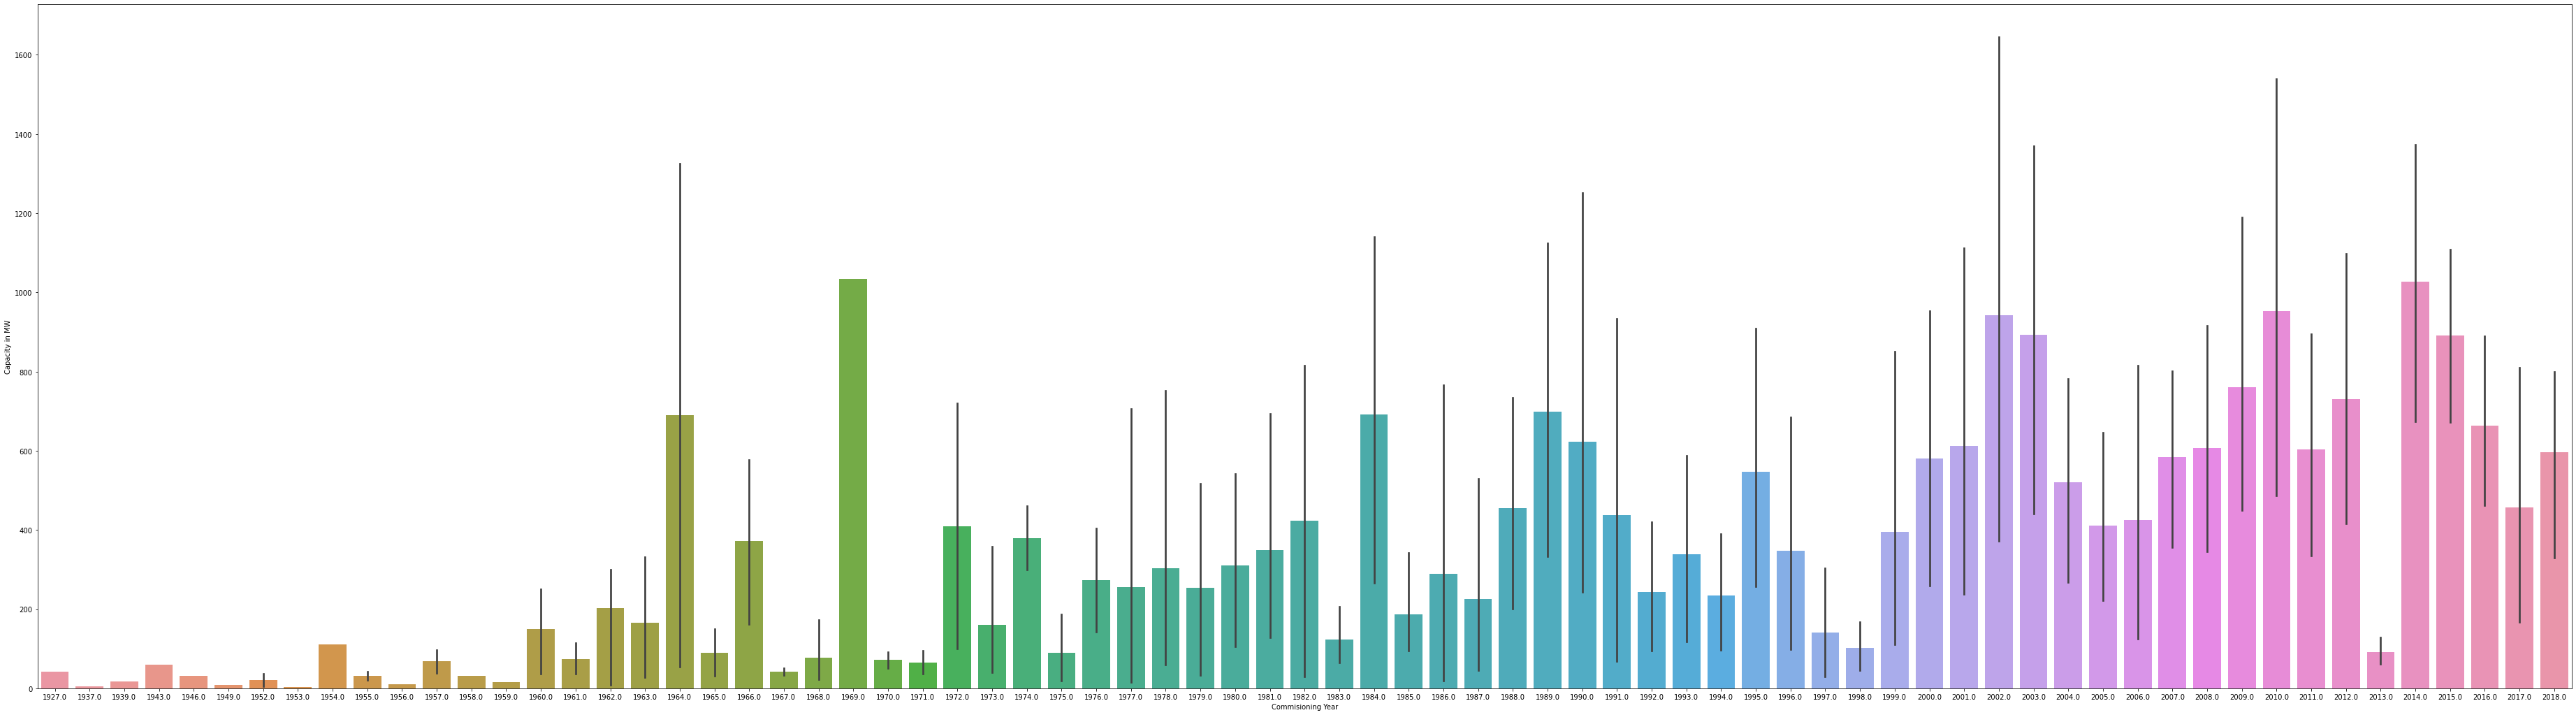

In [43]:

# Checking the distribution of capacity Vs commissioning_year

plt.figure(figsize=[65,18])
sns.barplot(x='commissioning_year', y='capacity_mw', data=data)
plt.xlabel('Commisioning Year')
plt.ylabel('Capacity in MW')
plt.show()

From the graph we can say that the new plants have more capacity than the older plants.

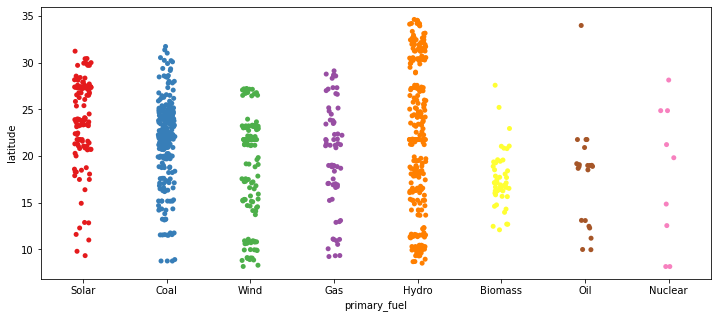

In [44]:
plt.figure(figsize=(12,5))
sns.stripplot(x=data['primary_fuel'], y=data['latitude'], palette='Set1')
plt.show()

As per the Latitude, we can find, "Hydro" primary_feul count is at the highest

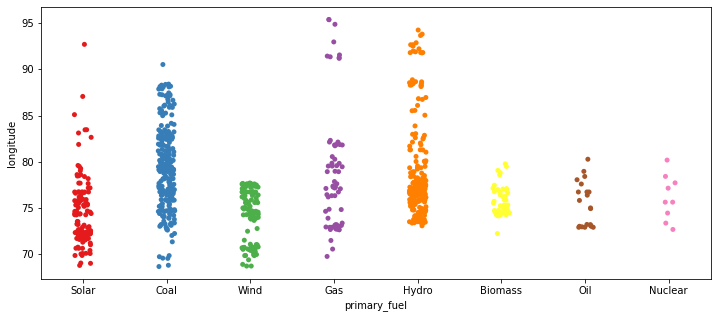

In [45]:
plt.figure(figsize=(12,5))
sns.stripplot(x=data['primary_fuel'], y=data['longitude'], palette='Set1')
plt.show()

As per the Longitude, we can find,"Gas" and "Hydro" primary_feul count is at the highest

### Multivariate Analysis

<AxesSubplot:>

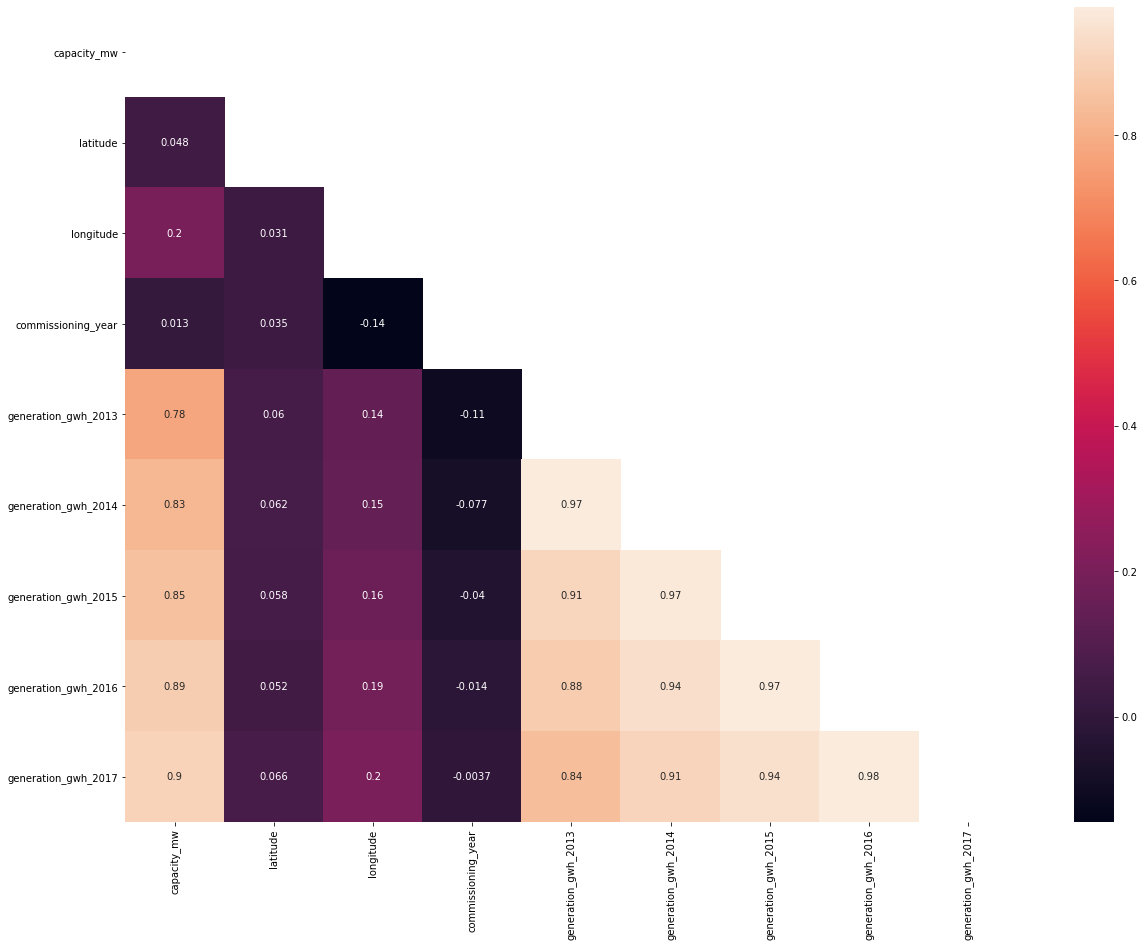

In [46]:
#plot correlation data using Heatmap

plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

In [48]:
#Correlation Table

data.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.047608,0.200473,0.012518,0.776258,0.827206,0.853262,0.886996,0.902431
latitude,0.047608,1.000000,0.030775,0.034731,0.059682,0.062287,0.058185,0.051890,0.066482
longitude,0.200473,0.030775,1.000000,-0.144785,0.141664,0.148365,0.162799,0.185938,0.201547
commissioning_year,0.012518,0.034731,-0.144785,1.000000,-0.108543,-0.077213,-0.039928,-0.014472,-0.003681
generation_gwh_2013,0.776258,0.059682,0.141664,-0.108543,1.000000,0.972933,0.911988,0.881259,0.843310
generation_gwh_2014,0.827206,0.062287,0.148365,-0.077213,0.972933,1.000000,0.966814,0.938005,0.907610
generation_gwh_2015,0.853262,0.058185,0.162799,-0.039928,0.911988,0.966814,1.000000,0.974765,0.944029
generation_gwh_2016,0.886996,0.051890,0.185938,-0.014472,0.881259,0.938005,0.974765,1.000000,0.976451
generation_gwh_2017,0.902431,0.066482,0.201547,-0.003681,0.843310,0.907610,0.944029,0.976451,1.000000


We could see,"generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016" and "generation_gwh_2017" are highly correlated features

## To Check Outliers

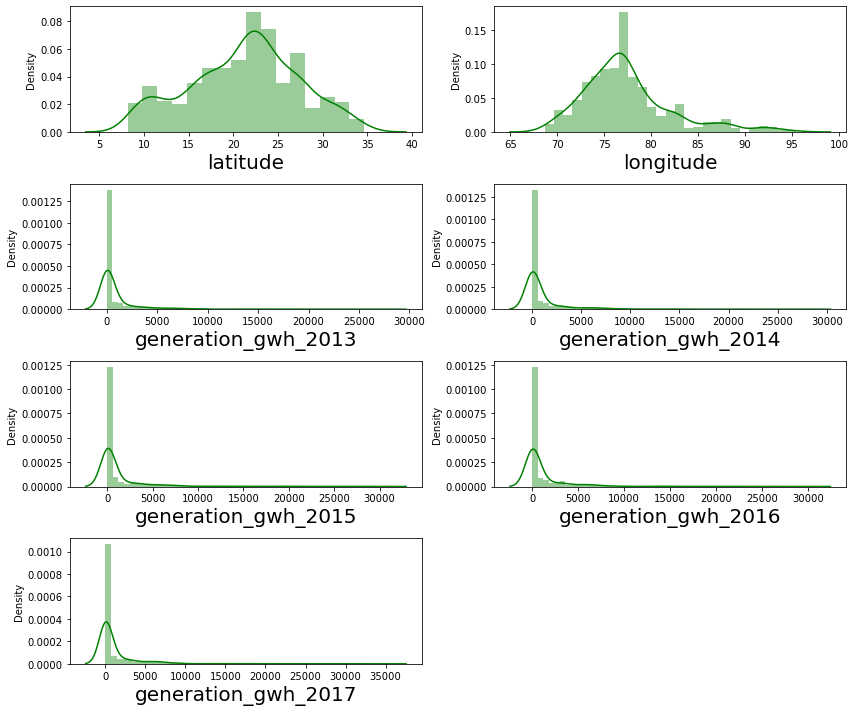

In [49]:
features = ['latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']

#Let's check for the How all our columns are distributed

plt.figure(figsize=(12,10))
plotnumber=1
for i in features:
    if plotnumber<=12:
        ax = plt.subplot( 4,2,plotnumber)
        sns.distplot(data[i],color = 'Green')
        plt.xlabel(i,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

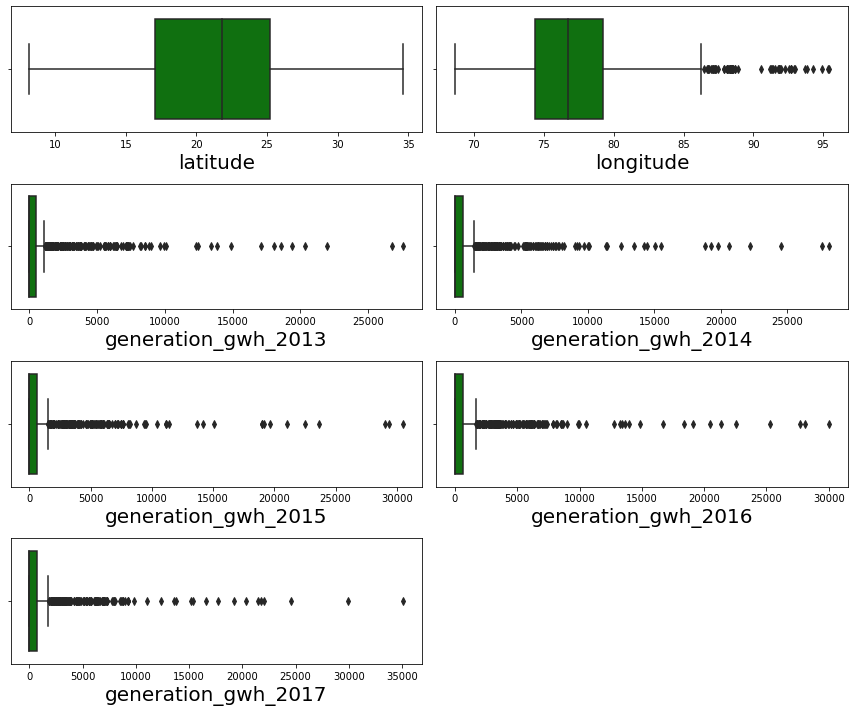

In [50]:
#Let's check for the How all our columns are distributed

plt.figure(figsize=(12,10))
plotnumber=1
for i in features:
    if plotnumber<=12:
        ax = plt.subplot( 4,2,plotnumber)
        sns.boxplot(data[i],color = 'Green')
        plt.xlabel(i,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [40]:
# As per the abve figure, The following features contains outliers

outliers = ['longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']


Let's remove these outliers by using some techniques

#### Applying IQR Method

In [41]:
Q1 = data[outliers].quantile(0.25)
Q3 = data[outliers].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[outliers] < (Q1-1.5*IQR)) | (data[outliers]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [42]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (908, 15)
Shape After          : (695, 15)
Percentage Loss      : 23.45814977973568


### Applying z-score Method

In [43]:
#importing libraries

from scipy.stats import zscore

In [44]:
z=np.abs(zscore(data[outliers]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [45]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (908, 15)
Shape After          : (870, 15)
Percentage Loss      : 4.185022026431718


By applying both the techniques, The percentage loss is more with IQR method, where as Zscore method leads to only 4.18% of data loss, so, let's proceed by using any one technique

In [46]:
data_new = data_new2.copy()  #data after applying th zscore method, let's copy this column

## Skewness

In [47]:
data_new.skew()  #Let's check the skewness

capacity_mw            2.167281
latitude              -0.119207
longitude              0.885973
commissioning_year    -1.831007
generation_gwh_2013    2.930768
generation_gwh_2014    2.795347
generation_gwh_2015    2.607784
generation_gwh_2016    2.534743
generation_gwh_2017    2.447941
dtype: float64

`"capacity_mw"` - Target column, so we will not remove the skewness

`"commissioning_year"` - contains the years(ordinal data) - So, we will not remove the skewness

`"longitude","generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016" and "generation_gwh_2017"` - Has the skewness greater than 0.5

Hence, let's now remove the skewness

##### Let's remove the skewness by using Power Transformation method

In [48]:
from sklearn.preprocessing import PowerTransformer  #Importing Libraries

pt=PowerTransformer()

data_new['longitude']=pt.fit_transform(data_new['longitude'].values.reshape(-1,1))
data_new['generation_gwh_2013']=pt.fit_transform(data_new['generation_gwh_2013'].values.reshape(-1,1))
data_new['generation_gwh_2014']=pt.fit_transform(data_new['generation_gwh_2014'].values.reshape(-1,1))
data_new['generation_gwh_2015']=pt.fit_transform(data_new['generation_gwh_2015'].values.reshape(-1,1))
data_new['generation_gwh_2016']=pt.fit_transform(data_new['generation_gwh_2016'].values.reshape(-1,1))
data_new['generation_gwh_2017']=pt.fit_transform(data_new['generation_gwh_2017'].values.reshape(-1,1))

In [49]:
data_new.skew()  #Let's re-check the Skewness

capacity_mw            2.167281
latitude              -0.119207
longitude             -0.001619
commissioning_year    -1.831007
generation_gwh_2013    0.552091
generation_gwh_2014    0.512074
generation_gwh_2015    0.431735
generation_gwh_2016    0.387704
generation_gwh_2017    0.383643
dtype: float64

We could see most of the skewness has been removed

<AxesSubplot:>

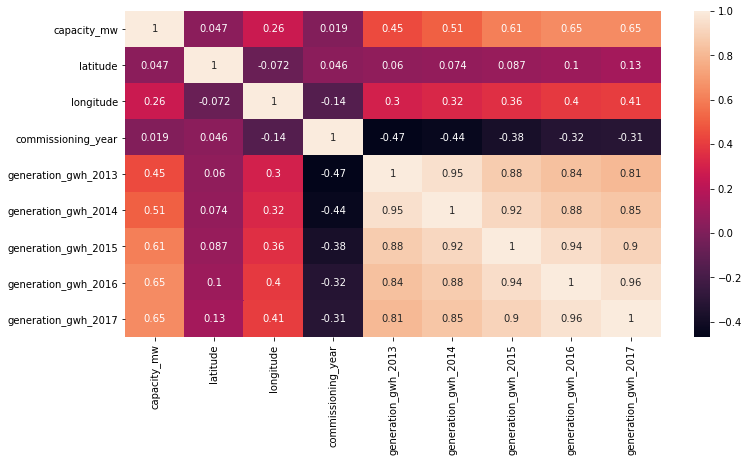

In [50]:
#correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(data_new.corr(), annot=True)

We could see,"generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016" and "generation_gwh_2017" correlation value is quite reduced

# Encoding the Categorical data

In [51]:
#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function


data_new['source'] = le.fit_transform(data_new['source'].values.reshape(-1,1))
data_new['primary_fuel'] = le.fit_transform(data_new['primary_fuel'].values.reshape(-1,1))
data_new['fuel_type'] = le.fit_transform(data_new['fuel_type'].values.reshape(-1,1))
data_new['renewable'] = le.fit_transform(data_new['renewable'].values.reshape(-1,1))


In [52]:
#Get dummies
l1=pd.get_dummies(data_new['geolocation_source'])

#Concat with main dataframe by dropping workclass dataframe
data_new=pd.concat([data_new.drop('geolocation_source',axis=1),l1],axis=1)

In [53]:
#Get dummies
l2=pd.get_dummies(data_new['other_fuel1'])

#Concat with main dataframe by dropping workclass dataframe
data_new=pd.concat([data_new.drop('other_fuel1',axis=1),l2],axis=1)

In [54]:
data_new.head()  #updated dataset, which is now ready for model building

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type,renewable,Industry About,National Renewable Energy Laboratory,WRI,0,Cogeneration,Gas,Oil
0,2.5,28.1839,-0.936291,6,2011.0,109,-0.773903,-0.790734,-0.830554,-0.850613,-0.852174,4,1,0,1,0,1,0,0,0
1,98.0,24.7663,-0.511443,1,2013.0,174,-0.773903,-0.790734,-0.830554,-0.850613,-0.852174,0,0,0,0,1,1,0,0,0
2,39.2,21.9038,-2.389333,7,2013.0,21,-0.773903,-0.790734,-0.830554,-0.850613,-0.852174,5,1,0,0,1,1,0,0,0
3,135.0,23.8712,2.500120,2,2004.0,22,1.278664,1.235426,1.227885,1.197565,1.135434,0,0,0,0,1,1,0,0,0
4,1800.0,21.9603,1.283154,1,2015.0,22,1.390722,1.421772,1.466779,1.457040,1.428091,0,0,0,0,1,0,0,0,1


### Splitting features and labels

In [55]:
X = data_new.drop(columns = ['capacity_mw','primary_fuel']) #Features (after dropping the targeted columns)

#We have 2 targets for prediction
Y_fuel = data_new['primary_fuel'] #Label1
Y_capacity = data_new['capacity_mw'] #Label2

-----------------

# To Predict "primary_fuel"

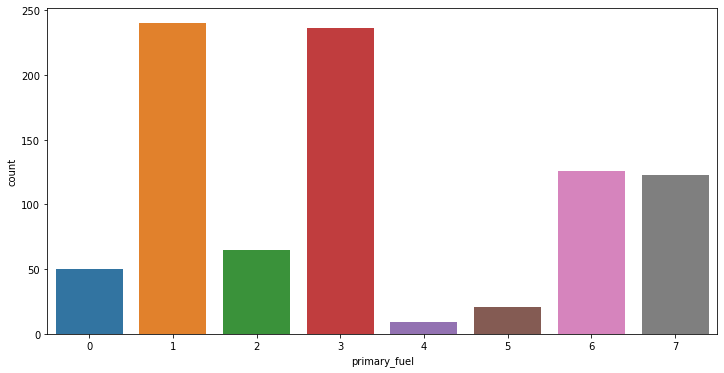

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x='primary_fuel', data=data_new)
plt.show()

Target column: `primary_fuel`
    - contains multiple classes (fuel data)

###### Hence, we need to build Multiple Classification Model

### Balance the Imbalanced class

In [70]:
# Handiling the class having imbalance using SMOTE (Oversampling method)

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y_fuel)

In [71]:
round(Y_over.value_counts(normalize=True)*100,2).astype('str')+'%'

0    12.5%
1    12.5%
2    12.5%
3    12.5%
4    12.5%
5    12.5%
6    12.5%
7    12.5%
Name: primary_fuel, dtype: object

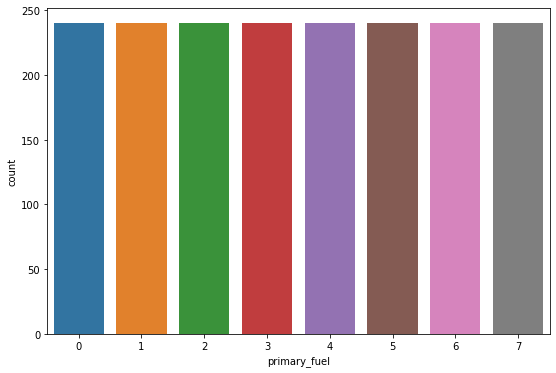

In [72]:
plt.figure(figsize=(9,6))
sns.countplot(Y_over)
plt.show()

##### We could see, all the classes of the Target Column are now balanced

### Scaling the data

Using the StandardScaler

In [73]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

### Finding the Best Random State

In [72]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(150):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.15,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.9722222222222222  with Random State  50


### Splitting Training and Testing data

In [75]:
#TrainTestSplit
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.15,random_state = maxAcc)

## Model Building

In [76]:
#Importing Libraries


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import scikitplot as skplt

LogisticRegression() 

Accuracy Score: 0.9722222222222222
Avg_Cross_Validation Score:  0.9390625


<Figure size 1080x432 with 0 Axes>

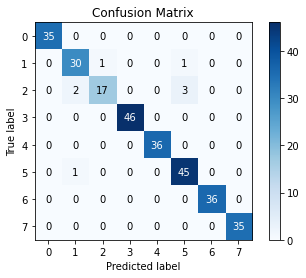

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.91      0.94      0.92        32
           2       0.94      0.77      0.85        22
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        36
           5       0.92      0.98      0.95        46
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35

    accuracy                           0.97       288
   macro avg       0.97      0.96      0.97       288
weighted avg       0.97      0.97      0.97       288

------------------------------------------------------------------------------------------------------------------------ 

RandomForestClassifier() 

Accuracy Score: 0.9930555555555556
Avg_Cross_Validation Score:  0.9854166666666666


<Figure size 1080x432 with 0 Axes>

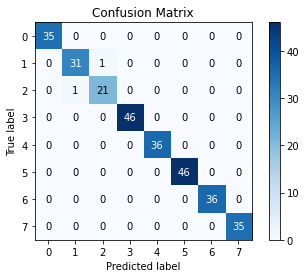

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.97      0.97        32
           2       0.95      0.95      0.95        22
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288

------------------------------------------------------------------------------------------------------------------------ 

GradientBoostingClassifier() 

Accuracy Score: 0.9895833333333334
Avg_Cross_Validation Score:  0.9802083333333332


<Figure size 1080x432 with 0 Axes>

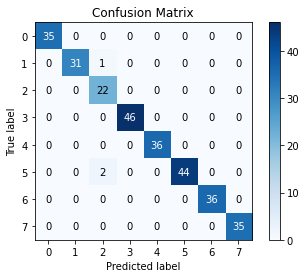

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.97      0.98        32
           2       0.88      1.00      0.94        22
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        36
           5       1.00      0.96      0.98        46
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35

    accuracy                           0.99       288
   macro avg       0.98      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288

------------------------------------------------------------------------------------------------------------------------ 

GaussianNB() 

Accuracy Score: 0.9270833333333334
Avg_Cross_Validation Score:  0.909375


<Figure size 1080x432 with 0 Axes>

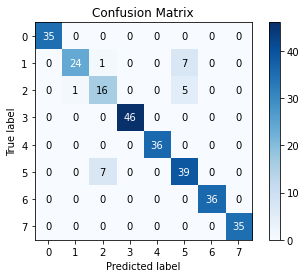

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.96      0.75      0.84        32
           2       0.67      0.73      0.70        22
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        36
           5       0.76      0.85      0.80        46
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35

    accuracy                           0.93       288
   macro avg       0.92      0.92      0.92       288
weighted avg       0.93      0.93      0.93       288

------------------------------------------------------------------------------------------------------------------------ 

SVC() 

Accuracy Score: 0.9756944444444444
Avg_Cross_Validation Score:  0.9421875


<Figure size 1080x432 with 0 Axes>

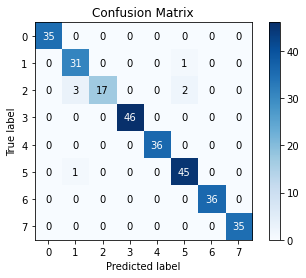

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.89      0.97      0.93        32
           2       1.00      0.77      0.87        22
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        36
           5       0.94      0.98      0.96        46
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35

    accuracy                           0.98       288
   macro avg       0.98      0.96      0.97       288
weighted avg       0.98      0.98      0.98       288

------------------------------------------------------------------------------------------------------------------------ 



In [81]:
lr=LogisticRegression()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
gnb = GaussianNB()
svc=SVC()


models=[lr,rf,gb,gnb,svc]


train=[]
test=[]
cv=[]

for m in models:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=accuracy_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=accuracy_score(y_test,pred_test)
    test.append(test_score*100)

    print(m,'\n')
    print("Accuracy Score:",accuracy_score(y_test,pred_test))
    score = (cross_val_score(m,X_scaled,Y_over,cv=5)).mean()
    print('Avg_Cross_Validation Score: ',score)
    cv.append(score*100)
    
    plt.figure(figsize=[15,6])
    skplt.metrics.plot_confusion_matrix(y_test,pred_test)
    plt.show()
          
    print(classification_report(y_test,pred_test))      
    print('-'*120,'\n')
    
    
Overall_score={'Model':['Logistic Regression','RandomForestClassifier',
                         'GradientBoostingClassifier','GaussianNB','SVC'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)

##### Let's check for our Overall scores of our models:

In [82]:
Overall_score 

,Model,Training Score,Test Score,Cross Validation Score
0,Logistic Regression,93.750000,97.222222,93.906250
1,RandomForestClassifier,100.000000,99.305556,98.541667
2,GradientBoostingClassifier,100.000000,98.958333,98.020833
3,GaussianNB,90.073529,92.708333,90.937500
4,SVC,94.178922,97.569444,94.218750


In [83]:
#Let's get a new column, that shows the difference between Prediction Test Accuracy Score and Cross Validation Score

Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']

In [84]:
Overall_score  #display the table

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,Logistic Regression,93.750000,97.222222,93.906250,3.315972
1,RandomForestClassifier,100.000000,99.305556,98.541667,0.763889
2,GradientBoostingClassifier,100.000000,98.958333,98.020833,0.937500
3,GaussianNB,90.073529,92.708333,90.937500,1.770833
4,SVC,94.178922,97.569444,94.218750,3.350694


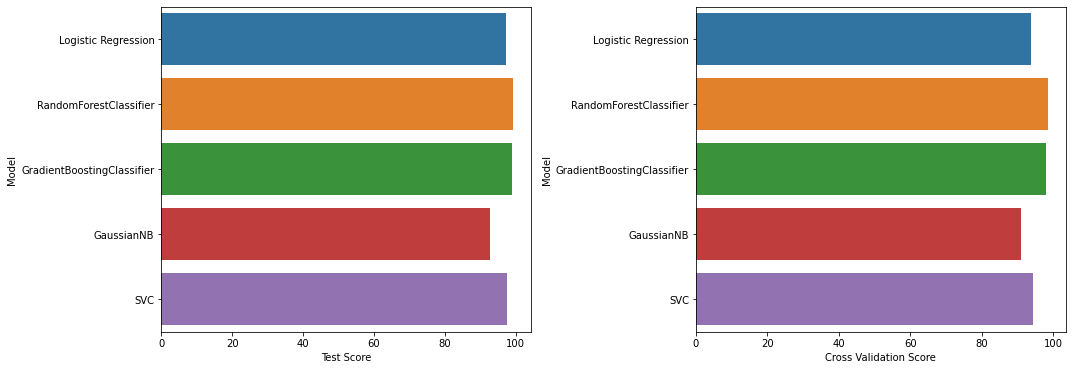

In [107]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Test Score', y = 'Model', data = Overall_score)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Validation Score', y = 'Model', data = Overall_score)
plt.tight_layout()
plt.show()

In [85]:

Overall_score['Difference'].min()   #Find the value with least difference in "Difference Column"

0.7638888888888999

In [93]:
#Let's check the row that has the least difference value in "Difference Column"

Overall_score[Overall_score['Difference']==0.7638888888888999]

,Model,Training Score,Test Score,Cross Validation Score,Difference
1,RandomForestClassifier,100.0,99.305556,98.541667,0.763889


    "RandomForest Classifier" model comes up with "high accuracy score" and with least difference between the Accuracy Score and the Cross validation score.

## "RandomForest Classifier" is our best model with 99.30 % Accuracy Score

Let's Hyper tune our model to increase the accuracy score

## Hyper Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

#parameters
param_grid = {'n_estimators':[50,100],
             'max_features':['auto','sqrt'],
             'max_depth':[4,5,None],'min_samples_split' : [2, 5, 10],
             'criterion':['gini','entropy'],'min_samples_leaf': [1, 2, 3]}   

gridsearch=GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid,cv=5)     

gridsearch.fit(x_train,y_train) #training the model


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [88]:
print(gridsearch.best_score_, gridsearch.best_params_)  #finding the best parameters

0.9803999924954505 {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [89]:
Rand_Final = RandomForestClassifier(n_estimators=50,max_features='sqrt',max_depth=None,criterion='gini',min_samples_split=2,min_samples_leaf=1)

Rand_Final.fit(x_train,y_train)  #training the model
y_pred = Rand_Final.predict(x_test)  #predicting

## Performance Metrics

In [90]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9965277777777778


Our model score increased by 0.00347222222 %

## Our model is now ready to predict the "Primary_fuel used for the Global Power Plant" with 99.65 % Accuracy

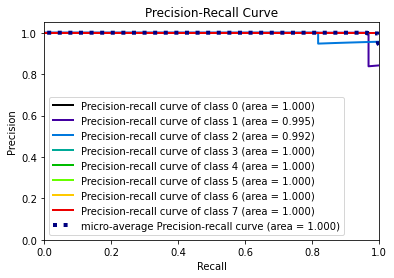

In [100]:
#Let's plot_precision_recall_curve

import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a RandomForest classifier after tuning. We'll generate probabilities on the test set.
Rand_Final.fit(x_train, y_train)
probas = Rand_Final.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

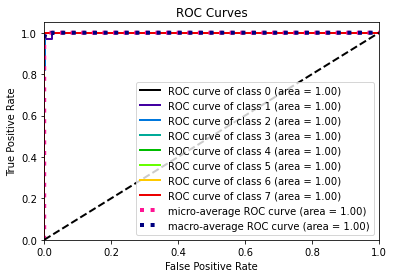

In [101]:
# Now plot_roc curve.

skplt.metrics.plot_roc(y_test, probas)

plt.show()

<Figure size 1080x432 with 0 Axes>

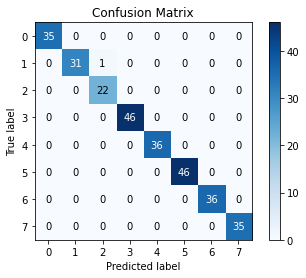

In [102]:
#Confusion Matrix

plt.figure(figsize=[15,6])
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()
          

In [103]:
##classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.97      0.98        32
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        35

    accuracy                           1.00       288
   macro avg       0.99      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288



### Saving the Model for Future Predictions

In [91]:
import joblib
joblib.dump(Rand_Final,'Global_Power_Plant_Fuel_Predictions.obj')

['Global_Power_Plant_Fuel_Predictions.obj']

## Loading the saved model to predict the Primary_fuel

In [94]:
#Load the saved model

loaded_model = joblib.load(open('Global_Power_Plant_Fuel_Predictions.obj','rb'))

In [104]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model.score(x_test,y_test) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

Test score: 99.65 %


array([4, 0, 5, 5, 4, 5, 2, 7, 6, 0, 2, 4, 3, 7, 4, 7, 0, 7, 3, 4, 7, 0,
       6, 1, 4, 6, 1, 3, 6, 3, 4, 3, 5, 4, 7, 2, 2, 1, 2, 5, 3, 6, 0, 5,
       4, 0, 5, 5, 6, 6, 0, 3, 0, 2, 7, 5, 3, 6, 5, 4, 4, 7, 5, 3, 3, 6,
       7, 6, 3, 7, 2, 7, 7, 0, 6, 0, 2, 4, 3, 2, 6, 7, 4, 7, 4, 4, 6, 6,
       5, 2, 5, 2, 4, 3, 2, 5, 5, 4, 4, 3, 3, 1, 7, 4, 5, 5, 5, 4, 3, 5,
       4, 3, 4, 0, 3, 6, 2, 3, 0, 6, 7, 1, 6, 5, 4, 0, 0, 3, 3, 3, 5, 6,
       7, 5, 1, 3, 5, 5, 1, 1, 3, 1, 7, 0, 4, 1, 7, 6, 5, 3, 5, 1, 1, 5,
       2, 3, 4, 2, 0, 5, 6, 2, 3, 5, 3, 4, 0, 0, 0, 1, 2, 1, 5, 0, 6, 1,
       5, 1, 3, 6, 4, 0, 0, 5, 6, 5, 5, 0, 3, 6, 7, 1, 4, 3, 5, 3, 1, 5,
       7, 1, 6, 7, 3, 3, 2, 3, 3, 0, 7, 6, 3, 0, 6, 3, 6, 0, 0, 3, 1, 4,
       5, 1, 1, 6, 6, 7, 4, 4, 6, 4, 0, 3, 4, 1, 3, 5, 7, 1, 6, 0, 1, 5,
       2, 4, 3, 6, 7, 6, 2, 1, 0, 7, 7, 5, 6, 7, 7, 5, 1, 0, 5, 0, 7, 2,
       7, 5, 6, 5, 2, 4, 3, 3, 7, 0, 7, 3, 7, 3, 1, 1, 1, 5, 0, 2, 5, 1,
       4, 0])

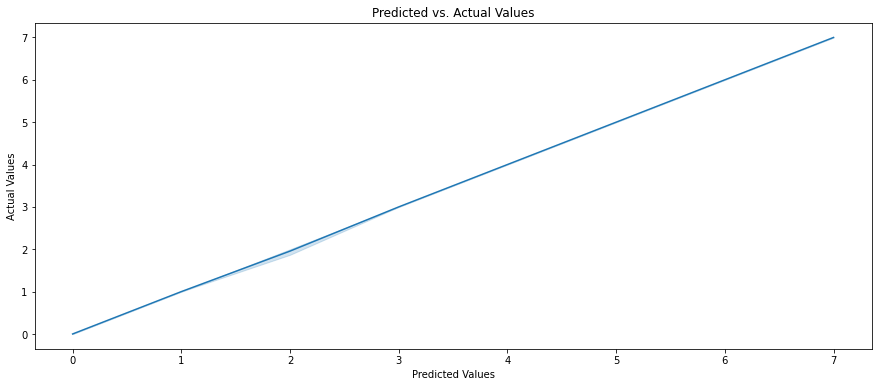

In [105]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [106]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions))
Result = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

pd.set_option ('display.max_rows', None)  #to display maximum rows

Result

,Actual,Predicted
0,4,4
1,0,0
2,5,5
3,5,5
4,4,4
5,5,5
6,2,2
7,7,7
8,6,6
9,0,0


----------------

### Our Model is now ready for the "primary_fuel" predictions

---------------

## Prediction: capacity_mw 

Need to build a model in order to predict the Global Power Plant "Capacity_mw"

In [74]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error  #importing libraries for model metrics


Earlier we have scaled the balanced class data, but now we will scale the extracted feature.

### Scaling the data
Using the StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled1 = Scaler.fit_transform(X)

#### Finding the Best Random State

In [78]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(150):
    x_train1,x_test1,y_train1,y_test1 = train_test_split(X_scaled1,Y_capacity,test_size = 0.15,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train1,y_train1)
    predrf = LR.predict(x_test1)
    Score = r2_score(y_test1,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.6850713758575111  with Random State  90


### Splitting Training and Testing data

In [79]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_scaled1, Y_capacity, test_size =0.15, random_state = maxRS)


# Model Building

In [85]:
#Importing all required Libraries that will be used for building a model

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet #LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import HuberRegressor

RandomForestRegressor()
R Squared (R2):  78.83206303340108
Mean Squared Error (MSE):  34642.85860094105
Root Mean Squared Error (RMSE):  186.12592135686273
Mean Absolute Error (MAE):  83.97243542042244


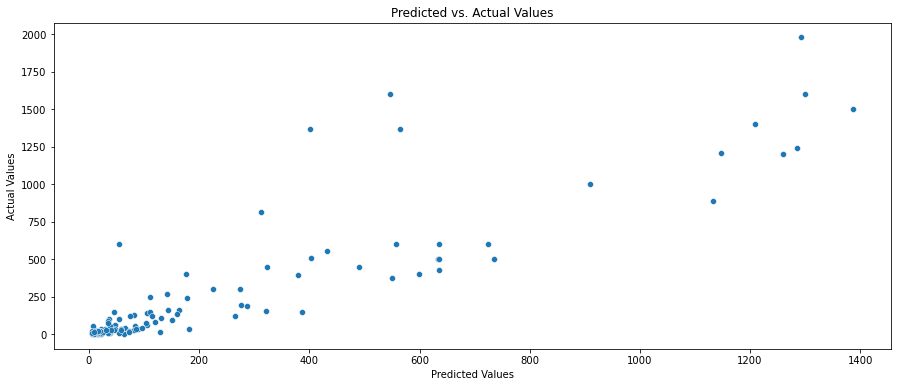

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  72.27910063227485
Mean Squared Error (MSE):  45367.2551369713
Root Mean Squared Error (RMSE):  212.995904038015
Mean Absolute Error (MAE):  116.76042595419847


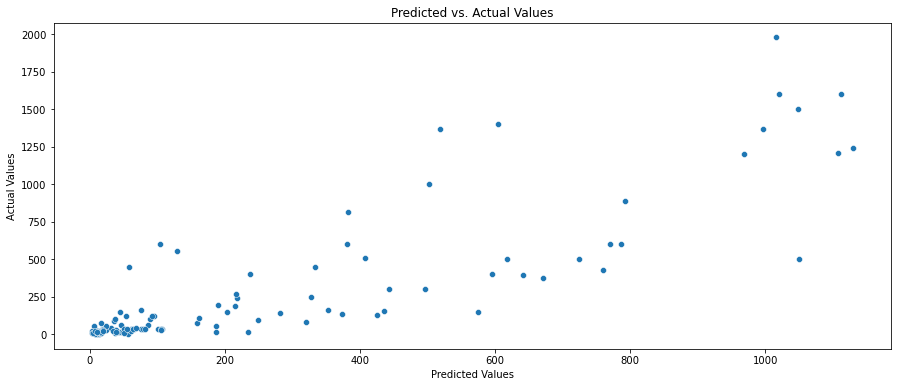

------------------------------------------------------------------------------------------------------------------------
HuberRegressor()
R Squared (R2):  60.072898184729695
Mean Squared Error (MSE):  65343.587554816215
Root Mean Squared Error (RMSE):  255.62391819784042
Mean Absolute Error (MAE):  133.07754873966277


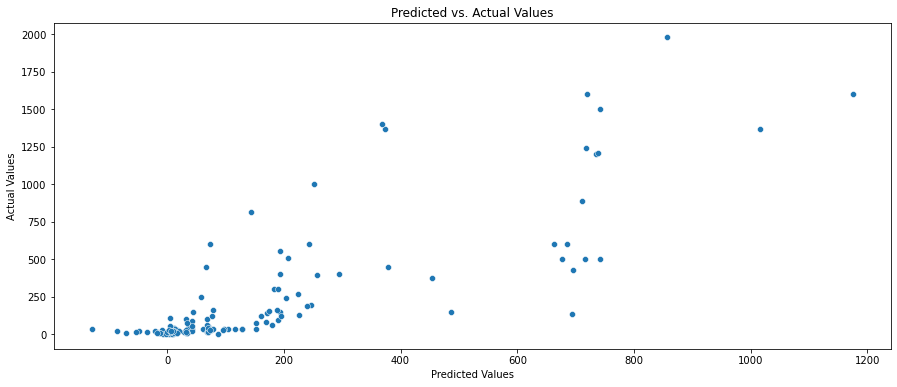

------------------------------------------------------------------------------------------------------------------------
ExtraTreesRegressor()
R Squared (R2):  81.37449943271943
Mean Squared Error (MSE):  30481.977697787894
Root Mean Squared Error (RMSE):  174.59088664013336
Mean Absolute Error (MAE):  79.37001404580153


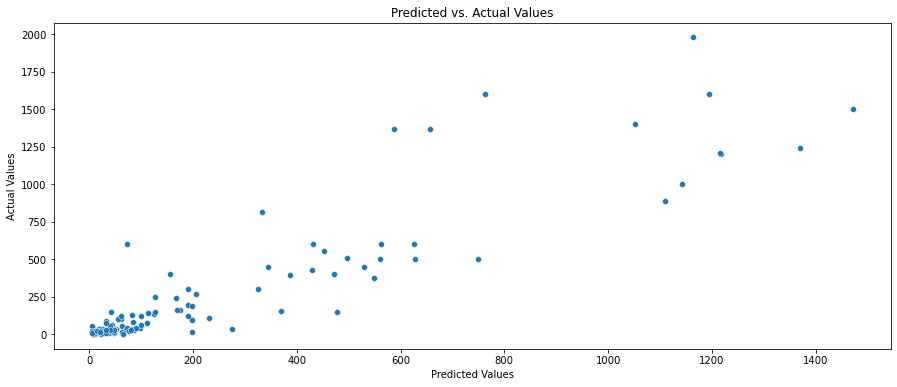

------------------------------------------------------------------------------------------------------------------------
ElasticNet()
R Squared (R2):  61.22778792871317
Mean Squared Error (MSE):  63453.527027726246
Root Mean Squared Error (RMSE):  251.89983530706456
Mean Absolute Error (MAE):  151.33218545758882


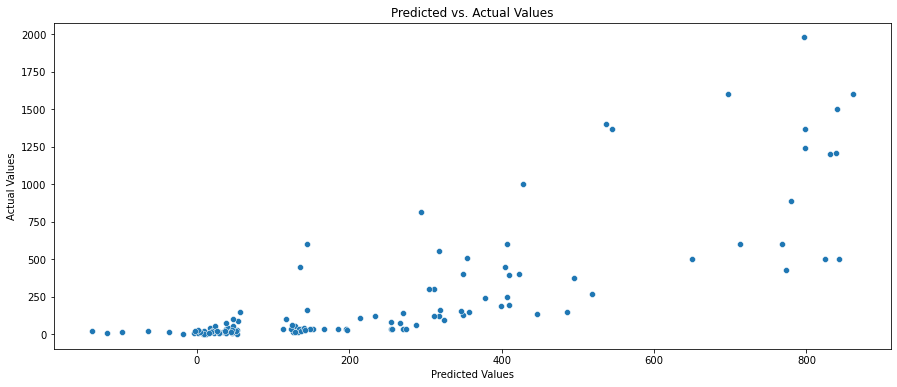

------------------------------------------------------------------------------------------------------------------------


In [103]:
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
hb=HuberRegressor()
et=ExtraTreesRegressor()
en = ElasticNet()

model=[rf,kn,hb,et,en]
kf = KFold(n_splits=3, random_state=90, shuffle=True)

train=[]
test=[]
cv=[]

for n in model:
    n = n.fit(x_train1,y_train1)
    pred_test=n.predict(x_test1)
    test_score=r2_score(y_test1,pred_test)
    test.append(test_score*100)
    print(n)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test1,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test1, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test1,pred_test))
    score=cross_val_score(n,X_scaled1,Y_capacity,cv=3)
    cv.append(score.mean()*100)
    plt.figure(figsize=[15,6])
    sns.scatterplot(x=pred_test, y=y_test1)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    
    
    
    
Overall_score1={'Model':['RandomForest','KNeighborsRegressor','HuberRegressor','ExtraTreesRegressor','ElasticNet'],
            'R2 Score':test,
            'Cross Validation Score': cv}
Overall_score1=pd.DataFrame(data=Overall_score1)

In [104]:
Overall_score1

,Model,R2 Score,Cross Validation Score
0,RandomForest,78.83206303340108,78.47435057428608
1,KNeighborsRegressor,72.27910063227485,48.92555102062954
2,HuberRegressor,60.072898184729695,49.7548153615176
3,ExtraTreesRegressor,81.37449943271943,76.39942787902663
4,ElasticNet,61.22778792871317,53.856360785614385


In [105]:
#Let's get a new column, that shows the difference between Prediction Test R2 Score and Cross Validation Score

Overall_score1['Difference'] = Overall_score1['R2 Score'] - Overall_score1['Cross Validation Score']

In [106]:
Overall_score1

,Model,R2 Score,Cross Validation Score,Difference
0,RandomForest,78.83206303340108,78.47435057428608,0.3577124591150067
1,KNeighborsRegressor,72.27910063227485,48.92555102062954,23.353549611645306
2,HuberRegressor,60.072898184729695,49.7548153615176,10.318082823212094
3,ExtraTreesRegressor,81.37449943271943,76.39942787902663,4.9750715536928
4,ElasticNet,61.22778792871317,53.856360785614385,7.371427143098785


        "RandomForest Regressor" model comes up with "high R2 score" and with least difference between the R2 Score and the     Cross validation score
    
## "RandomForest Regressor" is our best model with 78.83 % R2 Score

Let's Hyper tune our model to increase the R2 score

### Hyper Tuning

In [109]:
from sklearn.model_selection import GridSearchCV #importing library

#parameters
param_grid = {'n_estimators':[50,100,150],'criterion':['mae','mse'],'min_samples_split':range(1,5),
              'max_features':['auto','sqrt'],'min_weight_fraction_leaf':[0.0001,0.001,0.01,0.0]}   

gridsearch=GridSearchCV(estimator = rf, param_grid = param_grid,scoring='r2',cv=3)     

gridsearch.fit(x_train1,y_train1) #training

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mae', 'mse'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': range(1, 5),
                         'min_weight_fraction_leaf': [0.0001, 0.001, 0.01, 0.0],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [110]:
print(gridsearch.best_score_, gridsearch.best_params_)  #finding the best parameters

0.7869370991305176 {'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0001, 'n_estimators': 100}


In [111]:
#Applying the best parameters and building the model

Rand_Model = RandomForestRegressor(criterion= 'mse', max_features = 'sqrt', min_samples_split = 4, min_weight_fraction_leaf = 0.0001,
                   n_estimators= 100)  

Rand_Model.fit(x_train1,y_train1) #training

y_pred1 = Rand_Model.predict(x_test1)  #testing

### Performance Metrics

In [114]:
print('R Squared (R2): ',r2_score(y_test1, y_pred1))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test1,y_pred1))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test1, y_pred1)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test1,y_pred1))

R Squared (R2):  0.8156932874966851
Mean Squared Error (MSE):  30163.125440761884
Root Mean Squared Error (RMSE):  173.67534494211284
Mean Absolute Error (MAE):  77.63191151267803


Our model score increased by 0.0273726572 %

### Our model is now ready to predict the "Capacity_mw" with 81.57 % Accuracy

,Actual,Predictions
421,36.0,57.83506333333334
498,15.0,51.479313095238105
847,300.0,241.36213119047628
366,890.0,1115.5233214285713
893,16.0,10.517916666666665
...,...,...
587,160.0,149.44919321428569
356,20.0,20.053683571428568
685,105.7,124.03592833333335
618,19.0,13.525270238095233


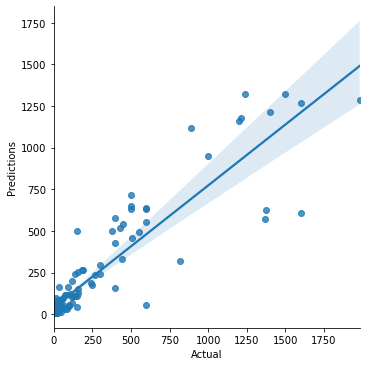

In [113]:
data_view1 = pd.DataFrame({'Actual':y_test1, 'Predictions':y_pred1},columns=['Actual','Predictions'])
sns.lmplot(x='Actual',y='Predictions',data=data_view1,palette='rainbow')
data_view1

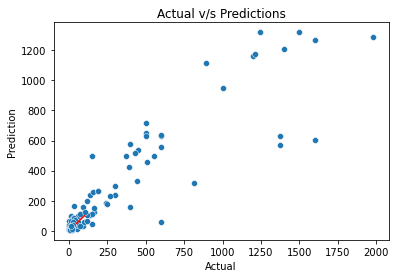

In [115]:
# plot LOO predictions against actual
plot_LOO = sns.scatterplot(y_test1, y_pred1)
plot_LOO.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(50,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predictions")
plt.show()

### Saving Model for Future Predictions

In [112]:
import joblib
joblib.dump(Rand_Model,'Global_Power_Plant_Capacity_Predictions.obj')

['Global_Power_Plant_Capacity_Predictions.obj']

### Loading the saved model to predict the data

In [116]:
#Load the saved model

loaded_model = joblib.load(open('Global_Power_Plant_Capacity_Predictions.obj','rb'))

In [117]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model.score(x_test1,y_test1) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test1)

Predictions

Test score: 81.57 %


array([  57.83506333,   51.4793131 ,  241.36213119, 1115.52332143,
         10.51791667,   20.30123905, 1319.26184524,   67.83510952,
         10.17263492,   54.21184921,   71.86464524,  106.48400952,
        161.5481456 ,   30.13644959,   47.29727619,   53.40426786,
         89.2389819 ,  328.63162036,  648.97632381,  127.2613127 ,
         49.57436429,  165.65877024,   11.99140119,    8.69809524,
        198.07229794,   37.89742143, 1158.77484762,   56.54652143,
        317.80584159,  240.8891425 ,  106.36422024,  572.86579714,
        555.85414036,   41.50546786,  186.58176294,   39.00457798,
         30.13644959,    9.64721905,   38.73665238,   28.06505238,
         24.46750714,   32.69821667,   11.98348274,   47.71470238,
         97.00737667,   12.20233333,   99.1360746 ,   13.30978274,
        605.30834698,  628.18986543,   55.79980833,    9.6971627 ,
         19.62716571,  255.09615333,   77.30979286,  630.17582619,
        494.81561321,   83.021475  ,   55.82170417,   43.81045

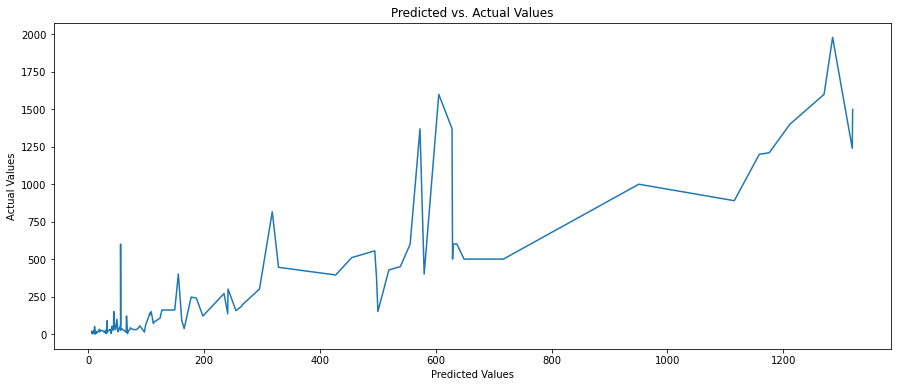

In [119]:
# plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions, y=y_test1)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [120]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test1, Predictions))


#creating a DataFrame that contains only the predictions and actual values

Result = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

In [122]:
pd.set_option ('display.max_rows', None)  #to display maximum rows

Result #Display

,Actual,Predicted
0,36.0,57.83506333333334
1,15.0,51.479313095238105
2,300.0,241.36213119047628
3,890.0,1115.5233214285713
4,16.0,10.517916666666665
5,16.0,20.30123904761905
6,1240.0,1319.2618452380952
7,2.5,67.83510952380954
8,3.0,10.172634920634922
9,40.0,54.2118492063492


----------

# Our model is now ready to predict Global Power Plant Capacity with "R2_Score: 81.57% "

----------

##### Both the target columns predictions are now ready and the model is saved for furture predictions